# KNN for Movie Recommendation

### Assigned to Chaitanya  Vallabhaneni

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
ratings = pd.read_csv('ratings.csv')
ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
unique_user = ratings.userId.nunique(dropna = True)
unique_movie = ratings.movieId.nunique(dropna = True)
print("number of unique user:")
print(unique_user)
print("number of unique movies:")
print(unique_movie)

number of unique user:
610
number of unique movies:
9724


In [5]:
# for creating item user matrix  .. we need to check how many ratings we have here or how many are absent .
total_ratings = unique_user*unique_movie
rating_present = ratings.shape[0]

ratings_not_provided = total_ratings - rating_present 

print("ratings not provided means some user have not watched some movies and its given by")
print(ratings_not_provided)
print("sparsity of user-item matrix is :")
print(ratings_not_provided / total_ratings)

ratings not provided means some user have not watched some movies and its given by
5830804
sparsity of user-item matrix is :
0.9830003169443864


In [6]:
# 1)plot ratings count which gives information about which rating(on scale of 0 t0 5) is more frequent

rating_cnt = pd.DataFrame(ratings.groupby('rating').size(),columns=['count'])
rating_cnt
# this rating cnt doesnt contain count of rating 0
# append rating_cnt

rating_cnt = rating_cnt.append(pd.DataFrame({'count':ratings_not_provided},index = [0])).sort_index()
rating_cnt

#since the count of rating 0 is too large in comparison to others rating ...use lag value
rating_cnt['log_count'] = np.log(rating_cnt['count'])
rating_cnt

,count,log_count
0.0,5830804,15.578665
0.5,1370,7.222566
1.0,2811,7.941296
1.5,1791,7.490529
2.0,7551,8.929435
2.5,5550,8.621553
3.0,20047,9.905835
3.5,13136,9.483112
4.0,26818,10.196829
4.5,8551,9.053804


frequency of rating like 3 and 4 are more in compare to other ratings


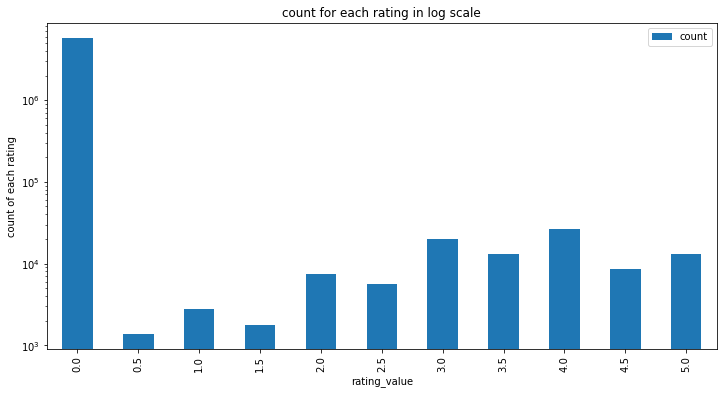

In [7]:
# plot a bar plot to visualise the ratings
rating_cnt_for_vis = rating_cnt
ax = rating_cnt_for_vis.reset_index().rename(columns = {'index':'rating_value'}).plot(
    x='rating_value',
    y='count',
    logy = True,
    kind='bar',
    title='count for each rating in log scale',
    figsize=(12,6)
)
ax.set_xlabel('rating_value')
ax.set_ylabel('count of each rating')
print("frequency of rating like 3 and 4 are more in compare to other ratings")

In [8]:
# 2) plot rating frequency of each movie(how many time a movie has been rated)

movie_freq = pd.DataFrame(ratings.groupby('movieId').size(),columns=['count'])
movie_freq.head()

,count
movieId,
1,215
2,110
3,52
4,7
5,49


Text(0, 0.5, 'rating freq of movies')

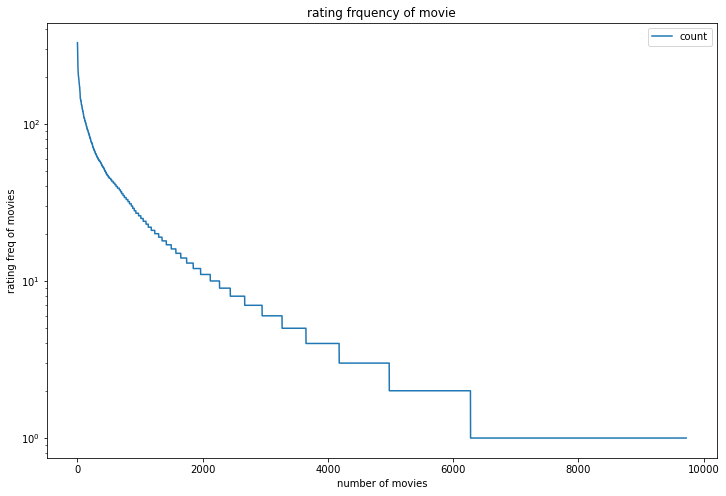

In [9]:
# plot movie rating freq
movie_freq_copy = movie_freq.sort_values(by='count',ascending=False)
movie_freq_copy=movie_freq_copy.reset_index(drop=True)

ax1  = movie_freq_copy.plot(
    title='rating frquency of movie',
    logy=True,
    figsize=(12,8)
)
ax1.set_xlabel('number of movies')
ax1.set_ylabel('rating freq of movies')

In [10]:
# we can see that most of the movies are rated very rarely ..
# so we can remove those movies which are rated less than 50 times.

threshold_rating_freq = 10
# first take out the movie id  for which movie is rated more than threshold value than keep only this movies in our original ratings dataframe
# movie_freq.query('count>= @threshold_rating_freq').shape = (13360,1)
# our original movie_freq has shape of (9724 ,1) and now its reduce to (2269,1)
# so now lets reduce the size of ratings dataframe

popular_movies_id = list(set(movie_freq.query('count>=@threshold_rating_freq').index))

# ratings df after dropping non popular movies
ratings_with_popular_movies = ratings[ratings.movieId.isin(popular_movies_id)]

print('shape of ratings:')
print(ratings.shape)

print('shape of ratings_with_popular_movies:')
print(ratings_with_popular_movies.shape)

print("no of movies which are rated more than 50 times:")
print(len(popular_movies_id))


print("no of unique movies present in dataset:")
print(unique_movie)

shape of ratings:
(100836, 4)
shape of ratings_with_popular_movies:
(81116, 4)
no of movies which are rated more than 50 times:
2269
no of unique movies present in dataset:
9724


In [11]:
user_cnt = pd.DataFrame(ratings.groupby('userId').size(),columns=['count'])
user_cnt_copy = user_cnt
user_cnt.head()

,count
userId,
1,232
2,29
3,39
4,216
5,44


Text(0, 0.5, 'rating frequency')

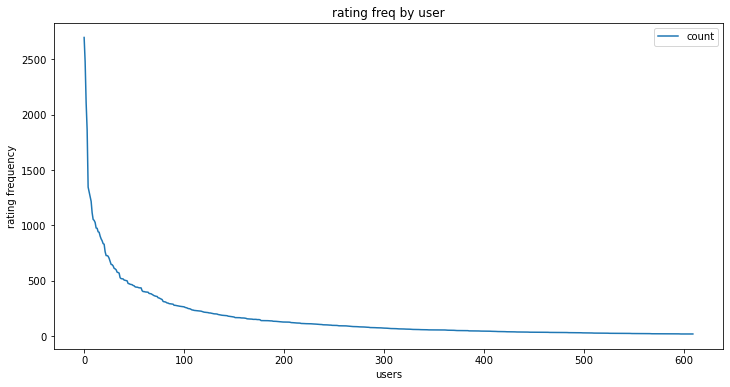

In [12]:
# plot rating freq
ax  = user_cnt_copy.sort_values('count',ascending=False).reset_index(drop=True).plot(
      title='rating freq by user',
      figsize=(12,6),
      
)
ax.set_xlabel("users")
ax.set_ylabel("rating frequency")

In [13]:
threshold_val = 30
active_user = list(set(user_cnt.query('count>=@threshold_val').index))

ratings_with_popular_movies_with_active_user = ratings_with_popular_movies[ratings_with_popular_movies.userId.isin(active_user)]

print('shape of ratings_with_popular_movies:')
print(ratings_with_popular_movies.shape)

print('shape of ratings_with_popular_movies_with_active_user:')
print(ratings_with_popular_movies_with_active_user.shape)

print("unique_user:")
print(unique_user)

print("active_user")
print(len(active_user))

print("unique_movies")
print(unique_movie)

print("popular_movies")
print(len(popular_movies_id))

shape of ratings_with_popular_movies:
(81116, 4)
shape of ratings_with_popular_movies_with_active_user:
(78712, 4)
unique_user:
610
active_user
501
unique_movies
9724
popular_movies
2269


In [14]:
final_ratings = ratings_with_popular_movies_with_active_user
final_ratings.shape


(78712, 4)

In [15]:
final_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100818,610,159093,3.0,1493847704
100829,610,164179,5.0,1493845631
100830,610,166528,4.0,1493879365
100833,610,168250,5.0,1494273047


In [16]:
item_user_mat = final_ratings.pivot(index='movieId',columns = 'userId',values='rating').fillna(0)

In [17]:
from sklearn.neighbors import NearestNeighbors
from knn import load, match, recommend, prepare

C:\ProgramData\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [20]:
movie_features_df=ratings_with_popular_movies.pivot_table(index='movieId',columns='userId',values='rating').fillna(0)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0


In [22]:
movie_to_index = {
    movie:i for i,movie in enumerate(list(movies.set_index('movieId').loc[item_user_mat.index].title))
}

In [23]:
from scipy.sparse import csr_matrix
item_user_mat_sparse = csr_matrix(item_user_mat.values)

In [24]:
from sklearn.neighbors import NearestNeighbors
recommendation_model = NearestNeighbors(metric='cosine',algorithm = 'brute',n_neighbors=20,n_jobs=-1)

In [28]:
from fuzzywuzzy import fuzz

def fuzzy_movie_name_matching (input_str,mapper,print_matches):
    # match_movie is list of tuple of 3 values(movie_name,index,fuzz_ratio)
    match_movie = []
    for movie,ind in mapper.items():
        current_ratio = fuzz.ratio(movie.lower(),input_str.lower())
        if(current_ratio>=50):
            match_movie.append((movie,ind,current_ratio))
     
    

    match_movie = sorted(match_movie,key =lambda x:x[2])[::-1]
    
    if len(match_movie)==0:
        print("Not Found\n")
        return -1
    if print_matches == True:
        print("Results\n")
        for title,ind,ratio in match_movie:
            print(title,ind,'\n')
     
        
    return match_movie[0][1]    
     

In [29]:
def make_recommendation(input_str,data,model,mapper,n_recommendation):
    print("system is working....\n")
    model.fit(data)
    
    index = fuzzy_movie_name_matching (input_str,mapper,print_matches = False)
    
    if index==-1 :
        print("pls enter a valid movie name\n")
        return 
    
    index_list = model.kneighbors(data[index],n_neighbors=n_recommendation+1,return_distance=False)
   
    index_to_movie={
        ind:movie for movie,ind in mapper.items()
    }
    
    print("Viewer who watches this movie",input_str,"also watches following movies.")
    
    for i in range(1,index_list.shape[1]):
        print(index_to_movie[index_list[0][i]])
    
    
    
    return 

In [30]:
make_recommendation('Toy Story',item_user_mat_sparse,recommendation_model,movie_to_index,10)

system is working....

Viewer who watches this movie  Toy Story also watches following movies.
Jurassic Park (1993)
Toy Story 2 (1999)
Star Wars: Episode IV - A New Hope (1977)
Forrest Gump (1994)
Independence Day (a.k.a. ID4) (1996)
Star Wars: Episode VI - Return of the Jedi (1983)
Lion King, The (1994)
Shrek (2001)
Apollo 13 (1995)
Back to the Future (1985)
